In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)

In [2]:
df = pd.read_csv("C:/Users/Battlestation/Documents/Visual Studio 2015/Projects/PythonApplication1/PythonApplication1/titanic.csv")
print(df.head())

   PassengerID                                           Name PClass    Age  \
0            1                   Allen, Miss Elisabeth Walton    1st  29.00   
1            2                    Allison, Miss Helen Loraine    1st   2.00   
2            3            Allison, Mr Hudson Joshua Creighton    1st  30.00   
3            4  Allison, Mrs Hudson JC (Bessie Waldo Daniels)    1st  25.00   
4            5                  Allison, Master Hudson Trevor    1st   0.92   

      Sex  Survived  SexCode  
0  female         1        1  
1  female         0        1  
2    male         0        0  
3  female         0        1  
4    male         1        0  


In [3]:
df.shape

(1313, 7)

In [4]:
df.info

<bound method DataFrame.info of       PassengerID                                              Name PClass  \
0               1                      Allen, Miss Elisabeth Walton    1st   
1               2                       Allison, Miss Helen Loraine    1st   
2               3               Allison, Mr Hudson Joshua Creighton    1st   
3               4     Allison, Mrs Hudson JC (Bessie Waldo Daniels)    1st   
4               5                     Allison, Master Hudson Trevor    1st   
5               6                                Anderson, Mr Harry    1st   
6               7                  Andrews, Miss Kornelia Theodosia    1st   
7               8                            Andrews, Mr Thomas, jr    1st   
8               9      Appleton, Mrs Edward Dale (Charlotte Lamson)    1st   
9              10                            Artagaveytia, Mr Ramon    1st   
10             11                         Astor, Colonel John Jacob    1st   
11             12  Astor, Mrs Jo

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 7 columns):
PassengerID    1313 non-null int64
Name           1313 non-null object
PClass         1313 non-null object
Age            756 non-null float64
Sex            1313 non-null object
Survived       1313 non-null int64
SexCode        1313 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 71.9+ KB


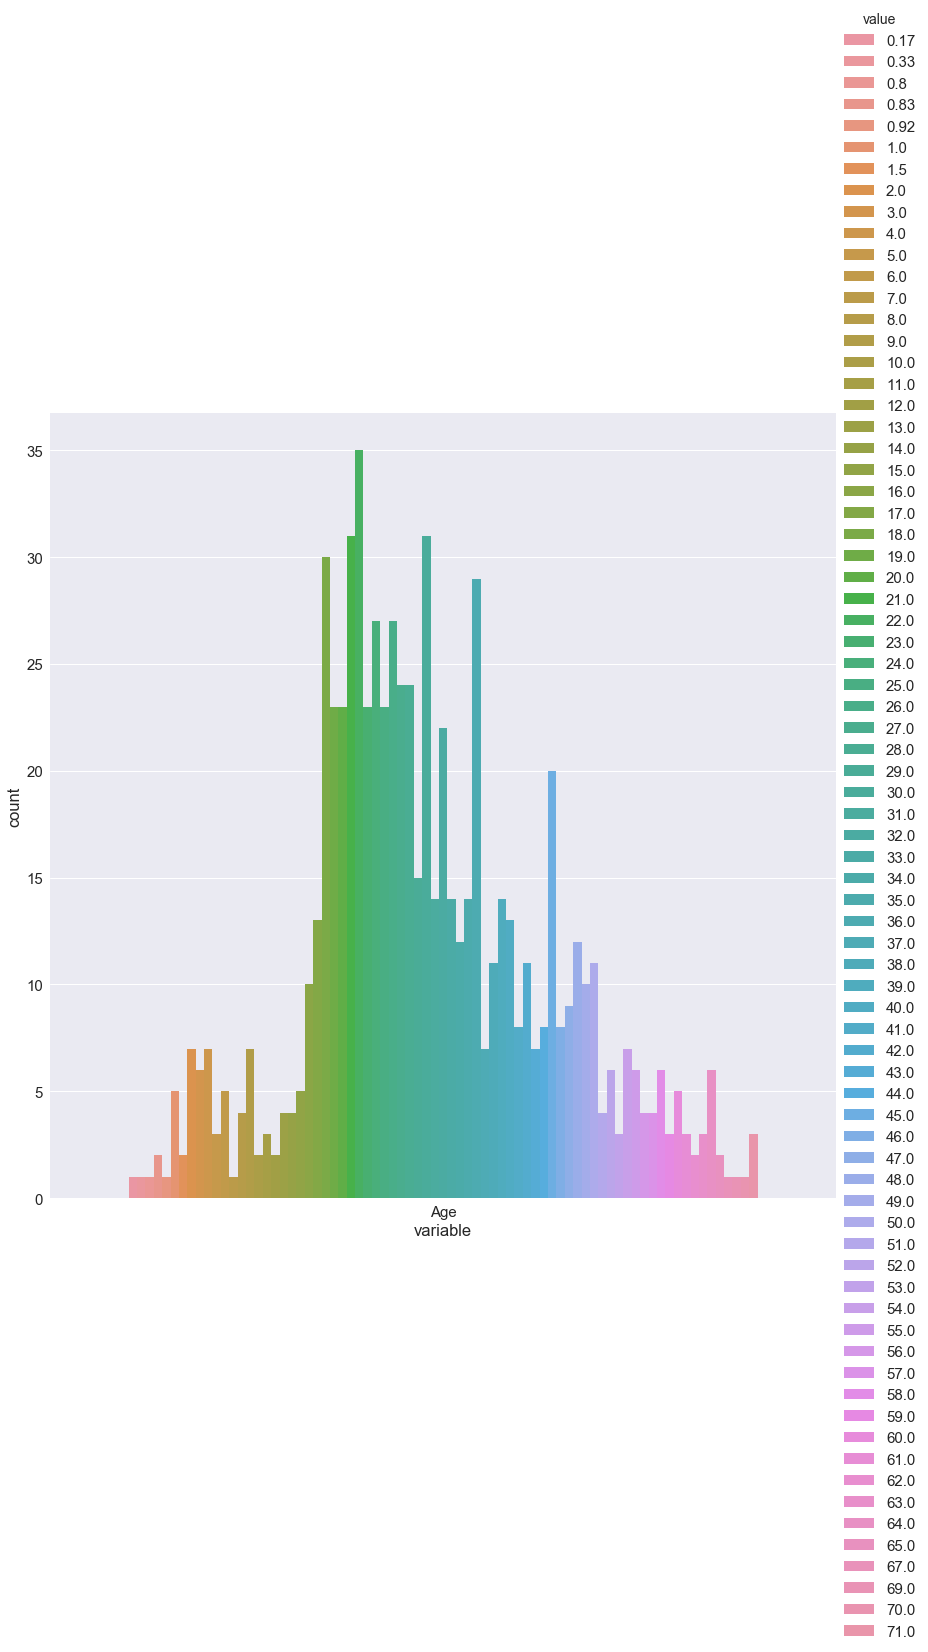

In [8]:
df_uniques = pd.melt(frame=df, value_vars=['Age'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

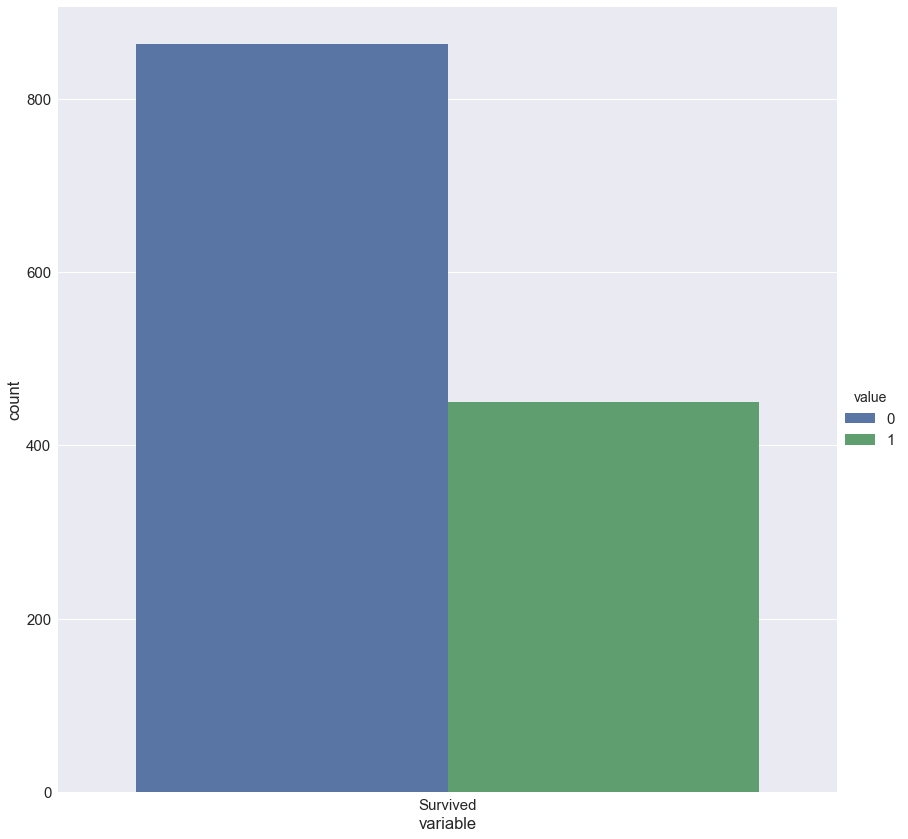

In [9]:
df_uniques = pd.melt(frame=df, value_vars=['Survived'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

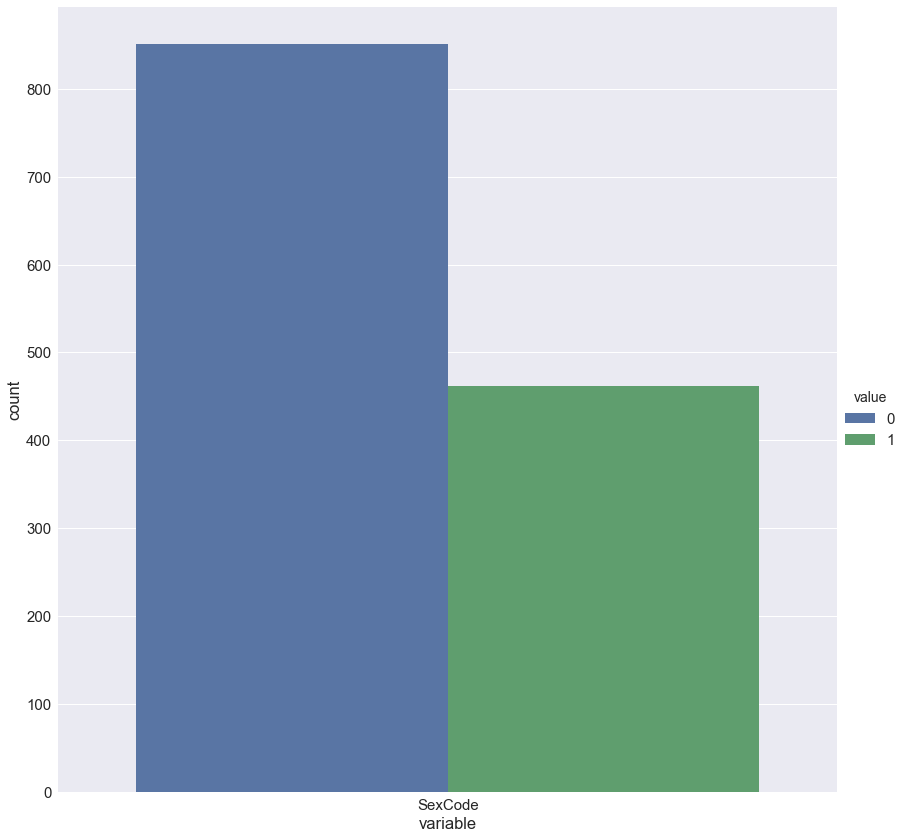

In [10]:
df_uniques = pd.melt(frame=df, value_vars=['SexCode'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

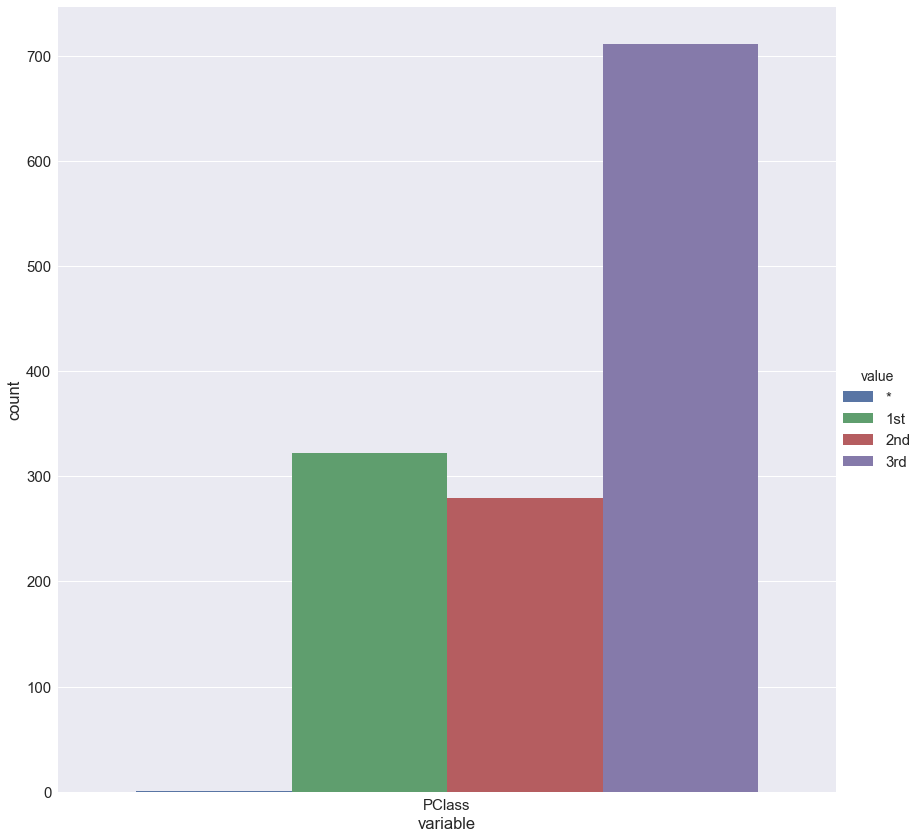

In [11]:

df_uniques = pd.melt(frame=df, value_vars=['PClass'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

In [15]:
# Немного статистики по уникальным значениям признаков.

for c in df.columns:
    n = df[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

PassengerID
1313
----------
Name
1310
----------
PClass
4
----------
Age
75
----------
Sex
2 [('female', 462), ('male', 851)]
----------
Survived
2 [(0, 863), (1, 450)]
----------
SexCode
2 [(0, 851), (1, 462)]
----------


In [ ]:
# Итого:

# Пять количественных признаков (без id)
# Семь категориальных
# 70000 элементов

# SexCode 2 [(0, 851), (1, 462)] 